#Project
###Analyzing Correlations and Regression Models
name: Avipreet singh

## Modules and files

In [50]:
# import the essential libraries
# read the data from a csv file and put them into a dataframe

import pandas as pd
import numpy as np
# data contains deaths by drug ovedose and population
df_deaths = pd.read_csv('/content/deaths-drug-overdoses-who.csv')
df_population = pd.read_csv('/content/gdp-vs-happiness.csv')

# research question 1(demographic disparity)
df_age = pd.read_csv('/content/median-age.csv')

# research question 2(socio_Economic Factors)
df_hdi = pd.read_csv('/content/human-development-index (1).csv')
df_income = pd.read_csv('/content/gross-national-income-per-capita.csv')
df_urban = pd.read_csv('/content/share-of-population-urban.csv')

# research question 3(Pharmaceutical Trends)
df_pres = pd.read_csv('/content/prescription.csv')

## Refining Data

### Data containing the deaths(df_deaths).

In [51]:
df_deaths.head()

,Entity,Code,Year,Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges
0,Afghanistan,AFG,2000,76.83,4.86,46.10,5.49
1,Afghanistan,AFG,2001,83.66,5.34,49.25,5.96
2,Afghanistan,AFG,2002,92.46,5.98,53.92,6.61
3,Afghanistan,AFG,2003,99.93,6.66,59.44,7.33
4,Afghanistan,AFG,2004,110.66,7.35,64.98,8.04


In [52]:
# lets sum up all deaths

df_deaths['Total-deaths'] = df_deaths['Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges']+df_deaths['Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges']+df_deaths['Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges']+df_deaths['Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges']

In [53]:
# only using the latest data
df_deaths = df_deaths[df_deaths['Year'] == 2019 ]
df_population = df_population[df_population["Year"]==2019]
# merge the two dataframes based on the common column "Code"

df_deaths =pd.merge(df_deaths, df_population, on="Entity")

In [54]:
#adding new column
df_deaths['deaths_by_population'] = (df_deaths['Total-deaths']/df_deaths['Population (historical estimates)'])*100000

In [55]:
df_deaths.columns

Index(['Entity', 'Code_x', 'Year_x',
       'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Total-deaths', 'Code_y', 'Year_y', 'Cantril ladder score',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Continent',
       'deaths_by_population'],
      dtype='object')

In [56]:
df_deaths = df_deaths.drop([ 'Code_x', 'Year_x','Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges','Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges','Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges','Total-deaths', 'Code_y', 'Year_y', 'Cantril ladder score','GDP per capita, PPP (constant 2017 international $)','Population (historical estimates)', 'Continent',], axis = 1)

In [57]:
df_deaths.head()

,Entity,Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges,deaths_by_population
0,Afghanistan,213.2000,0.868770
1,Africa,11947.5205,1.311071
2,Albania,11.6400,0.874427
3,Algeria,819.5000,2.302685
4,Angola,107.3700,0.636405


### Data containing the median age of each country(df_age).

In [58]:
df_age.head()

,Entity,Code,Year,Median age - Sex: all - Age: all - Variant: estimates,Median age - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,18.4,NaN
1,Afghanistan,AFG,1951,18.4,NaN
2,Afghanistan,AFG,1952,18.4,NaN
3,Afghanistan,AFG,1953,18.3,NaN
4,Afghanistan,AFG,1954,18.3,NaN


In [59]:
# only using the latest data
df_age = df_age[df_age['Year'] == 2019 ]
df_age = df_age.drop(['Year','Code','Median age - Sex: all - Age: all - Variant: medium'], axis = 1)

In [60]:
df_age.head()

,Entity,Median age - Sex: all - Age: all - Variant: estimates
69,Afghanistan,16.3
220,Africa (UN),18.5
371,Albania,36.5
522,Algeria,27.4
673,American Samoa,26.1


### Data containing the human development index of each country(df_age).


In [61]:
df_hdi.head()

,Entity,Code,Year,Human Development Index
0,Afghanistan,AFG,1990,0.273
1,Afghanistan,AFG,1991,0.279
2,Afghanistan,AFG,1992,0.287
3,Afghanistan,AFG,1993,0.297
4,Afghanistan,AFG,1994,0.292


In [62]:
# only using the latest data
df_hdi = df_hdi[df_hdi['Year'] == 2019 ]
df_hdi = df_hdi.drop(['Year','Code'], axis = 1)

In [63]:
df_hdi.head()

,Entity,Human Development Index
29,Afghanistan,0.488
61,Albania,0.810
93,Algeria,0.748
115,Andorra,0.873
138,Angola,0.595


### Data containing the opioid analgesic consumption(df_pres).

In [64]:
df_pres

,Unnamed: 0,MME/TID in 2015\n(95% CI)*,MME/TID in 2019\n(95% CI)*,Average annual percentage\nchange (95% CI),P-value
0,Worldwide,24.06\n(13.77 to 42.03),21.65\n(12.15 to 38.56),0.36 (-2.76 to 3.58),0.82
1,Africa,1.44\n(0.14 to 14.85),0.88\n(0.03 to 29.95),-16.26 (-40.82 to 18.48),0.3
2,Egypt,0.7,0.61,-4.29 (-8.09 to -0.33),0.041
3,French West Africa,0.07,0.01,-61.69 (-96.82 to 362.15),0.31
4,Morocco,0.95,1.19,7.92 (-3.96 to 21.27),0.13
...,...,...,...,...,...
71,United Kingdom,694.44,615.73,-3.09 (-5.29 to -0.84),0.023
72,Oceania,542.40\n(13.80 to 21324.25),422.29\n(30.70 to 5808.63),-6.02 (-8.84 to -3.11),0.0019
73,Australia,816.18,565.36,-8.69 (-11.93 to -5.34),0.004
74,New Zealand,360.44,315.43,-3.27 (-6.18 to -0.27),0.041


In [65]:
df_pres = df_pres.drop(['MME/TID in 2015\n(95% CI)*','Average annual percentage\nchange (95% CI)','P-value'], axis = 1)

In [66]:
df_pres = df_pres.rename(columns={'Unnamed: 0': 'Entity'})

In [67]:
df_pres

,Entity,MME/TID in 2019\n(95% CI)*
0,Worldwide,21.65\n(12.15 to 38.56)
1,Africa,0.88\n(0.03 to 29.95)
2,Egypt,0.61
3,French West Africa,0.01
4,Morocco,1.19
...,...,...
71,United Kingdom,615.73
72,Oceania,422.29\n(30.70 to 5808.63)
73,Australia,565.36
74,New Zealand,315.43


In [68]:
rows = [0,1,7,11,14,23,37,46,72]
for i in rows:
  df_pres = df_pres.drop(i)

In [69]:
# converting the data from strings or mixture to float
df_pres['MME/TID in 2019\n(95% CI)*'] = df_pres['MME/TID in 2019\n(95% CI)*'].astype(float)

In [70]:
df_pres

,Entity,MME/TID in 2019\n(95% CI)*
2,Egypt,0.61
3,French West Africa,0.01
4,Morocco,1.19
5,South Africa,11.74
6,Tunisia,12.05
...,...,...
70,Switzerland,846.36
71,United Kingdom,615.73
73,Australia,565.36
74,New Zealand,315.43


### Data containing the population living in urban(df_urban).

In [71]:
df_urban

,Entity,Code,Year,Urban population (% of total population)
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586
...,...,...,...,...
14193,Zimbabwe,ZWE,2017,32.237
14194,Zimbabwe,ZWE,2018,32.209
14195,Zimbabwe,ZWE,2019,32.210
14196,Zimbabwe,ZWE,2020,32.242


In [72]:
# only using the latest data
df_urban = df_urban[df_urban['Year'] == 2019 ]
df_urban = df_urban.drop(['Year','Code'], axis = 1)

### Data containing the average income each country(df_income).

In [73]:
df_income.head()

,Entity,Code,Year,"GNI per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2017,2123.6765
1,Albania,ALB,1997,4496.9750
2,Albania,ALB,1998,4953.4907
3,Albania,ALB,1999,5596.6220
4,Albania,ALB,2000,6066.2896


In [74]:
# only using the latest data
df_income = df_income[df_income['Year'] == 2019 ]
df_income = df_income.drop(['Year','Code'], axis = 1)

In [75]:
df_income.head()

,Entity,"GNI per capita, PPP (constant 2017 international $)"
23,Albania,13484.7050
53,Algeria,11350.4580
73,Angola,5879.2617
106,Argentina,21205.4700
134,Armenia,14521.8380


## Creating a regression model

In [76]:
# merge the two dataframes based on the common column "Entity"
df_multi =pd.merge(df_deaths, df_pres, on="Entity")
df_multi =pd.merge(df_multi, df_hdi, on="Entity")
df_multi =pd.merge(df_multi,df_age, on="Entity")
df_multi = pd.merge(df_multi, df_urban, on='Entity')
df_multi = pd.merge(df_multi, df_income, on='Entity')

In [77]:
df_multi.corr()

<ipython-input-77-5c0961efe8e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_multi.corr()


,Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges,deaths_by_population,MME/TID in 2019\n(95% CI)*,Human Development Index,Median age - Sex: all - Age: all - Variant: estimates,Urban population (% of total population),"GNI per capita, PPP (constant 2017 international $)"
Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges,1.000000,0.165515,0.028236,-0.269735,-0.244765,-0.205406,-0.174509
deaths_by_population,0.165515,1.000000,0.425183,0.423698,0.157032,0.341841,0.410122
MME/TID in 2019\n(95% CI)*,0.028236,0.425183,1.000000,0.690667,0.492063,0.351817,0.724001
Human Development Index,-0.269735,0.423698,0.690667,1.000000,0.729861,0.558411,0.873010
Median age - Sex: all - Age: all - Variant: estimates,-0.244765,0.157032,0.492063,0.729861,1.000000,0.242637,0.528716
Urban population (% of total population),-0.205406,0.341841,0.351817,0.558411,0.242637,1.000000,0.469016
"GNI per capita, PPP (constant 2017 international $)",-0.174509,0.410122,0.724001,0.873010,0.528716,0.469016,1.000000


In [78]:
# import the required data visulaization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

(0.0, 10.30934143649318)

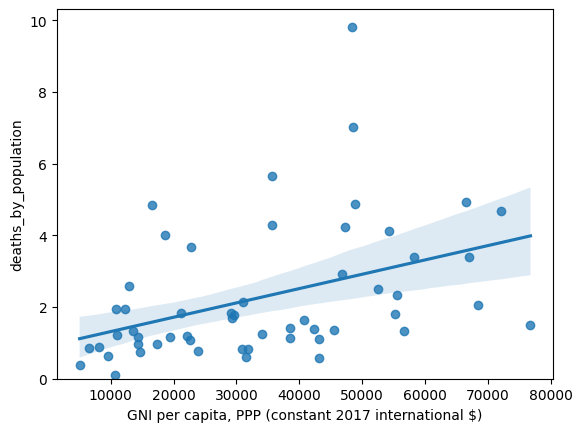

In [79]:
# Sketch the scatter/regression plot for the specified x and y variables

sns.regplot(x="GNI per capita, PPP (constant 2017 international $)", y="deaths_by_population", data=df_multi)
plt.ylim(0,)

In [80]:
# import the required stats library

from scipy import stats

In [81]:
df_multi.columns

Index(['Entity',
       'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges',
       'deaths_by_population', 'MME/TID in 2019\n(95% CI)*',
       'Human Development Index',
       'Median age - Sex: all - Age: all - Variant: estimates',
       'Urban population (% of total population)',
       'GNI per capita, PPP (constant 2017 international $)'],
      dtype='object')

In [82]:
df_multi =df_multi.dropna(subset=['deaths_by_population', 'Human Development Index', 'MME/TID in 2019\n(95% CI)*',
       'Median age - Sex: all - Age: all - Variant: estimates',
       'Urban population (% of total population)',
       'GNI per capita, PPP (constant 2017 international $)'])

In [83]:
# Calculate the Pearson Correlation Coefficient and the p-value to decide if the correlation is significant
# p-value < 0.05 indicates that the correlation is significant.
# p-value > 0.05 indicates that the correlation is not significant.

pc, pv = stats.pearsonr(df_multi["deaths_by_population"], df_multi["GNI per capita, PPP (constant 2017 international $)"])
print("Pearson Correlation Coefficient:", pc, "p-value:", pv)

Pearson Correlation Coefficient: 0.41012224109669315 p-value: 0.001872567341000556


In [84]:
# import the essential library for splitting the data into training and testing

from sklearn.model_selection import train_test_split

In [85]:
# identify the columns needed for the multiple regression model
# identify the 6 predictors and the y-variable

columns = ['deaths_by_population', 'Human Development Index',
            'MME/TID in 2019\n(95% CI)*',
       'Median age - Sex: all - Age: all - Variant: estimates',
       'Urban population (% of total population)',
       'GNI per capita, PPP (constant 2017 international $)']
subset=df_multi[columns]
x=df_multi[columns[1:6]]
y=df_multi[columns[0]]

In [86]:
# show the first 3 rows of the columns used for this model

subset.head(3)

,deaths_by_population,Human Development Index,MME/TID in 2019\n(95% CI)*,Median age - Sex: all - Age: all - Variant: estimates,Urban population (% of total population),"GNI per capita, PPP (constant 2017 international $)"
0,1.845056,0.852,3.84,30.8,91.991,21205.470
1,7.030556,0.941,565.36,36.4,86.124,48535.133
2,1.817580,0.919,746.67,42.4,58.515,55276.130


In [87]:
# give the descriptive statistics for the variables used in this model

subset.describe()

,deaths_by_population,Human Development Index,MME/TID in 2019\n(95% CI)*,Median age - Sex: all - Age: all - Variant: estimates,Urban population (% of total population),"GNI per capita, PPP (constant 2017 international $)"
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2.269058,0.851382,230.791273,37.001818,72.857636,33868.319053
std,1.855582,0.089803,285.593677,6.834078,15.351092,19026.890570
min,0.109971,0.546000,0.000000,19.800000,34.472000,5067.070300
25%,1.086283,0.784500,6.170000,30.950000,63.199500,16982.236500
50%,1.647098,0.871000,80.490000,39.800000,75.347000,31553.822000
75%,3.157964,0.925500,341.500000,42.050000,85.785000,47894.322500
max,9.823657,0.962000,902.710000,47.600000,98.041000,76755.910000


In [96]:
# build the multiple regression model with 6 predictors
# print the actual y value, the predicted y value and the difference/error for the first 5 countries in the list

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
ypred =  lm.fit(x,y).predict(x)
for i in range(5):
  print(df_multi['Entity'][i],y[i], ypred[i], y[i]-ypred[i])


Argentina 1.8450563850911899 2.7307078968854936 -0.8856515117943038
Australia 7.030556409138433 3.8447273774929993 3.185829031645434
Austria 1.8175800531963116 3.0661527463537244 -1.2485726931574128
Belarus 4.018928731541577 1.5398083489100678 2.4791203826315096
Belgium 2.497096364219701 3.7435019073217077 -1.2464055431020067


In [40]:
# print the coefficients of the multiple regression model

lm.coef_

array([ 1.04179986e+01,  1.79860764e-03, -8.47386349e-02,  1.07434360e-02,
       -1.04490297e-05])

In [41]:
# print the y-intercept of the multiple regression model

lm.intercept_

-4.309106442380992

In [42]:
# print the coefficients of determination (R-square) of the multiple regression model
# The R-square gives the percentage of variation in y which can explained by the 6 predictors included in the model

lm.score(x,y)

0.26875968598390254

In [43]:
# split the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 9
number of training samples: 46


In [44]:
lrm1=LinearRegression()

In [45]:
ypred=lrm1.fit(x_train, y_train)

In [46]:
lrm1.intercept_

-1.9778797803522603

In [47]:
lrm1.coef_

array([ 5.26327423e+00,  1.52920431e-03, -5.90442930e-02,  1.78334569e-02,
        8.37211973e-06])

In [48]:
lrm1.score(x_train, y_train)

0.2327967990755605

In [49]:
lrm1.score(x_test, y_test)

0.4277931100962681

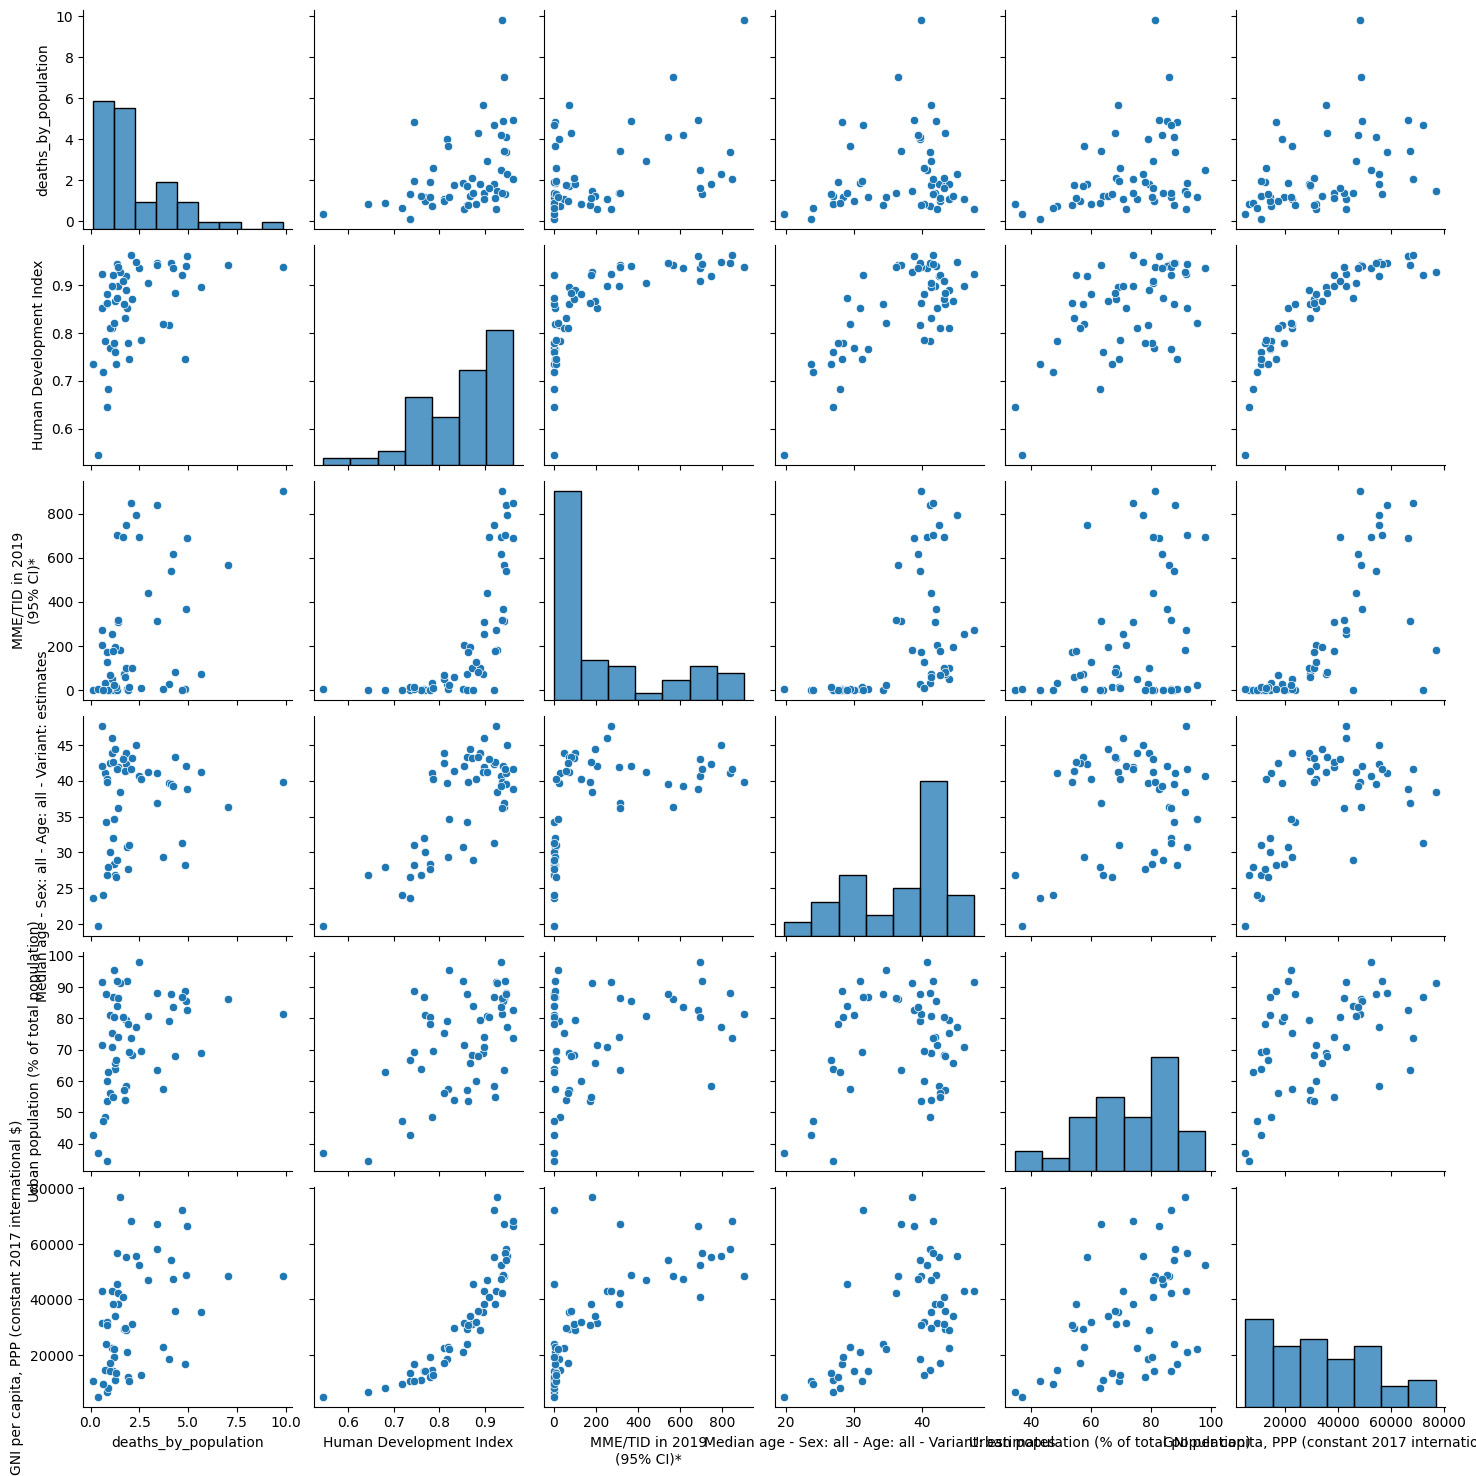

In [98]:
# Assuming 'x' is a DataFrame with predictor variables
import seaborn as sns

sns.pairplot(subset)
plt.show()